In [1]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/stroke-prediction-dataset-in-ml/healthcare-dataset-stroke-data.csv


In [3]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [5]:
file_path = "/kaggle/input/stroke-prediction-dataset-in-ml/healthcare-dataset-stroke-data.csv"
# load the dataset
stroke_data = pd.read_csv(file_path)
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
stroke_data.rename(columns = {'ever_married':'Marital_status', 'work_type':'Profession','Residence_type':'Residence_status',},inplace = True)
stroke_data

,id,gender,age,hypertension,heart_disease,Marital_status,Profession,Residence_status,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<Axes: xlabel='age', ylabel='bmi'>

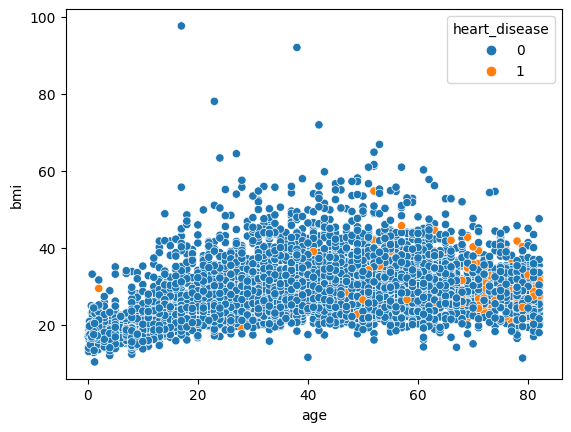

In [7]:
sns.scatterplot(data=stroke_data,x= 'age',y='bmi',hue ='heart_disease')

<Axes: xlabel='count', ylabel='Count'>

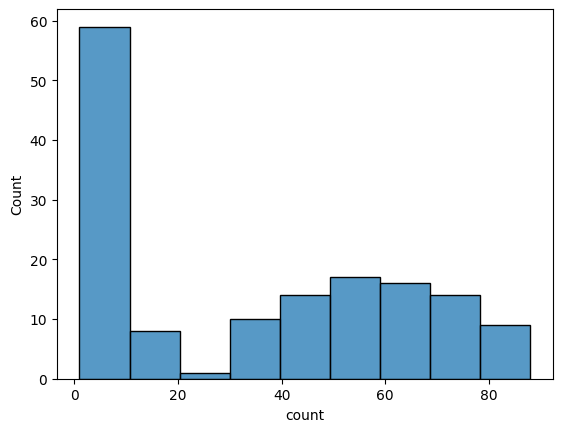

In [8]:
sns.histplot(data=stroke_data, x=stroke_data.groupby('age').heart_disease.value_counts())

In [9]:
stroke_data['age']=stroke_data['age'].astype('int64')
stroke_data.groupby('age').gender.value_counts().reset_index()

,age,gender,count
0,0,Male,28
1,0,Female,15
2,1,Female,42
3,1,Male,35
4,2,Male,29
...,...,...,...
162,80,Male,28
163,81,Female,38
164,81,Male,22
165,82,Female,33


<Axes: xlabel='count', ylabel='Count'>

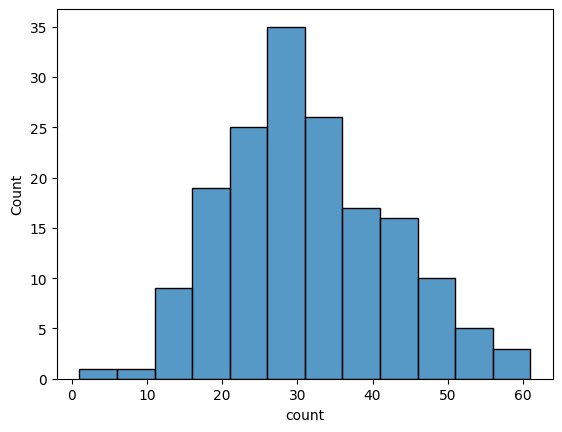

In [10]:
sns.histplot(data=stroke_data,x=stroke_data.groupby('age').gender.value_counts())

In [11]:
stroke_data.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
Marital_status        object
Profession            object
Residence_status      object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,Marital_status,Profession,Residence_status,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
stroke_data.tail()

,id,gender,age,hypertension,heart_disease,Marital_status,Profession,Residence_status,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [14]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   Marital_status     5110 non-null   object 
 6   Profession         5110 non-null   object 
 7   Residence_status   5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [15]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
Marital_status         0
Profession             0
Residence_status       0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: xlabel='bmi', ylabel='Count'>

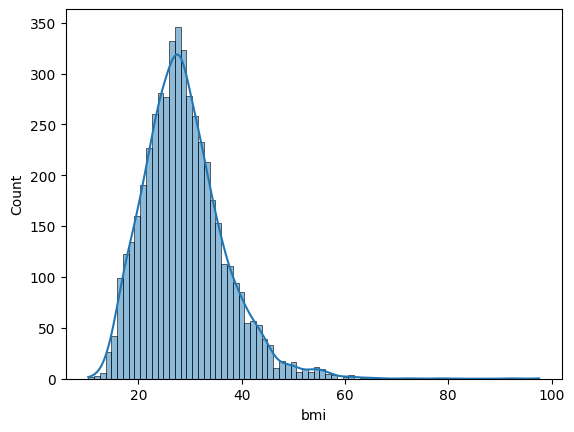

In [16]:
sns.histplot(data=stroke_data,x='bmi',kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x78a0641b5810>,
 'caps': [<matplotlib.lines.Line2D at 0x78a0641b5d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x78a0641b5570>],
 'medians': [<matplotlib.lines.Line2D at 0x78a0641b6290>],
 'fliers': [<matplotlib.lines.Line2D at 0x78a0641b6530>],
 'means': []}

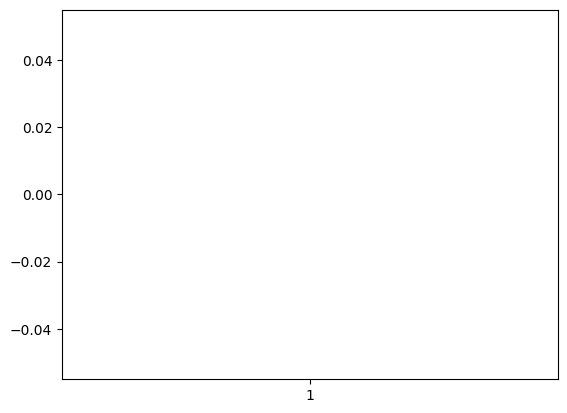

In [17]:
plt.boxplot(stroke_data['bmi'])

In [18]:
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(),inplace=True)

In [19]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
Marital_status       0
Profession           0
Residence_status     0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x78a0641b69b0>,
 'caps': [<matplotlib.lines.Line2D at 0x78a0641b72b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78a064173fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x78a0641b7b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x78a0641b7130>],
 'means': []}

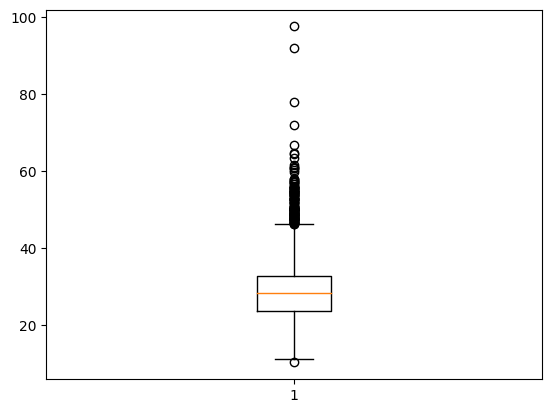

In [20]:
plt.boxplot(stroke_data['bmi'])

In [21]:
stroke_data.describe(include='number')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [22]:
stroke_data.describe(include='object')

,gender,Marital_status,Profession,Residence_status,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [23]:
display(stroke_data[['Profession','gender']].value_counts())

Profession     gender
Private        Female    1754
               Male      1170
Self-employed  Female     504
Govt_job       Female     399
children       Male       361
               Female     326
Self-employed  Male       315
Govt_job       Male       258
Never_worked   Female      11
               Male        11
Private        Other        1
Name: count, dtype: int64

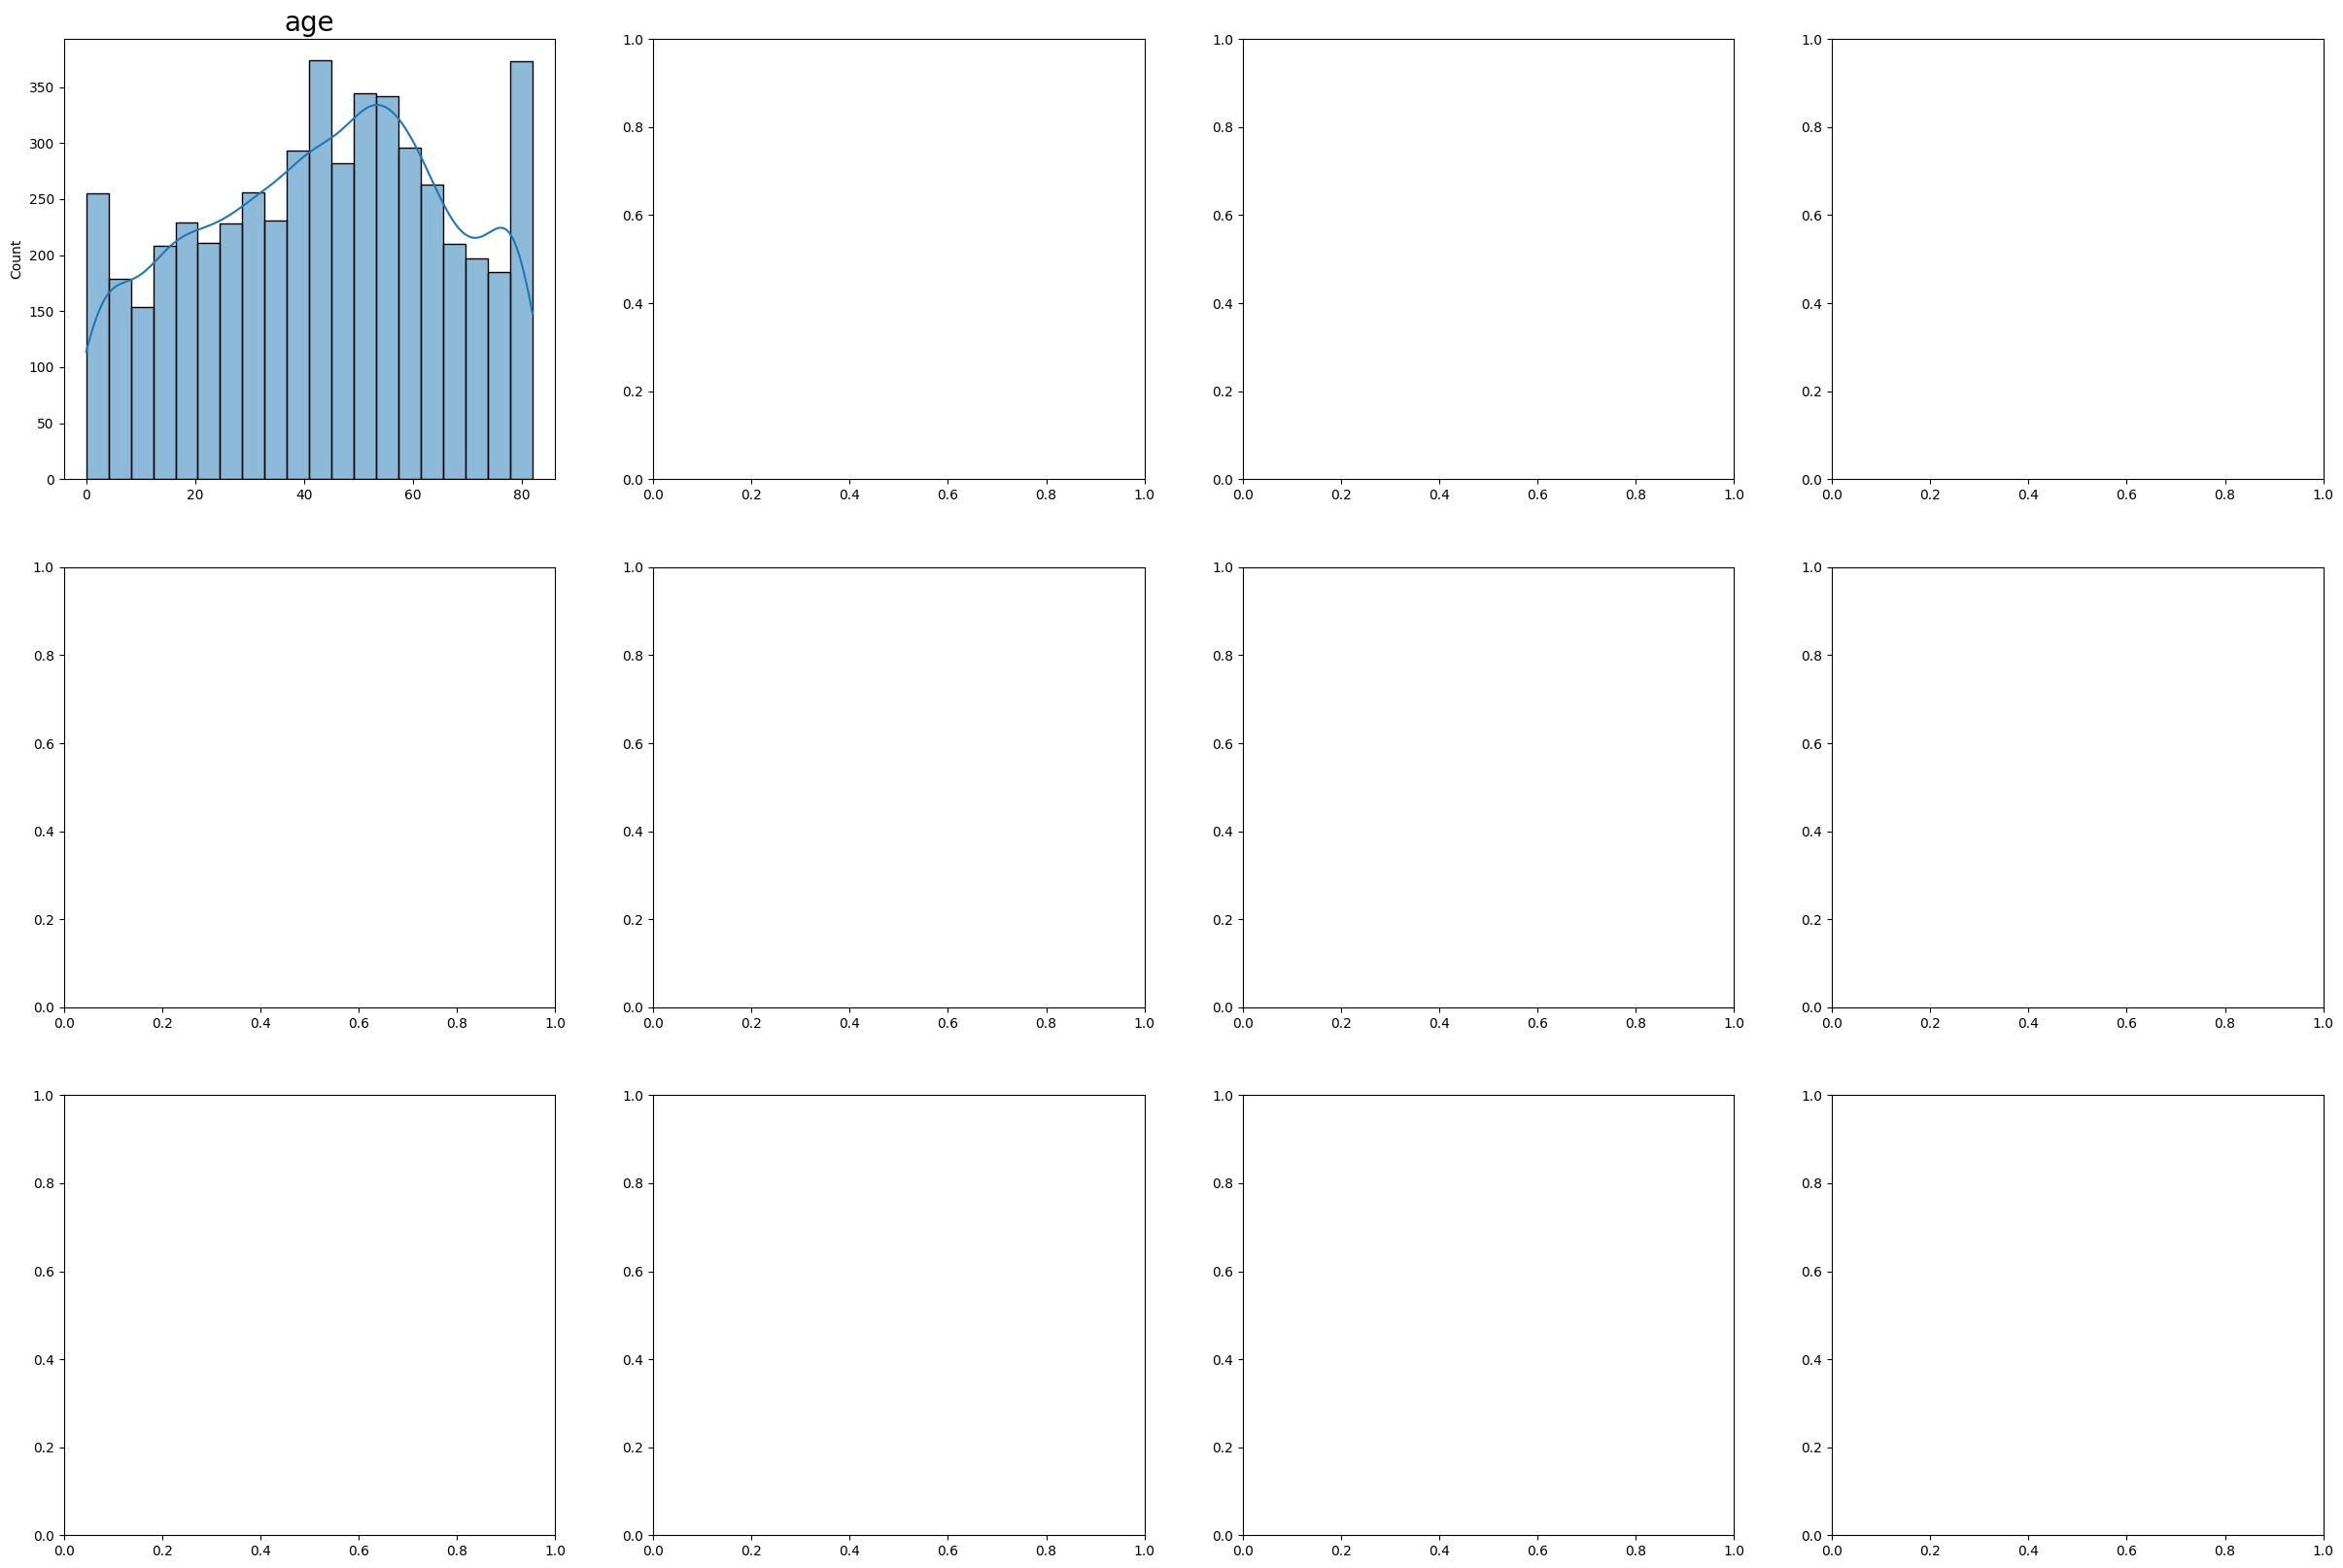

In [24]:
fig, ax= plt.subplots(3,4)
fig.set_size_inches(30,20)

columns = ['age','avg_glucose_level','bmi','gender','hypertension','heart_disease','Marital_status','Profession','Residence_status','smoking_status','stroke']
numerical_columns = ['age','avg_glucose_level','bmi']
for i, column in enumerate(columns):
    row = i//4
    col = i%4
    if column in numerical_columns:
        hist = sns.histplot(data=stroke_data,x= column,ax=ax[row,col],kde = True)
    else:
        hist = sns.histplot(data=stroke_data,x=column,ax=ax[row,col],hue=column)
    hist.set_title(column,fontsize=20)
    hist.set_xlabel('')
    plt.show()

Text(0, 0.5, 'stroke')

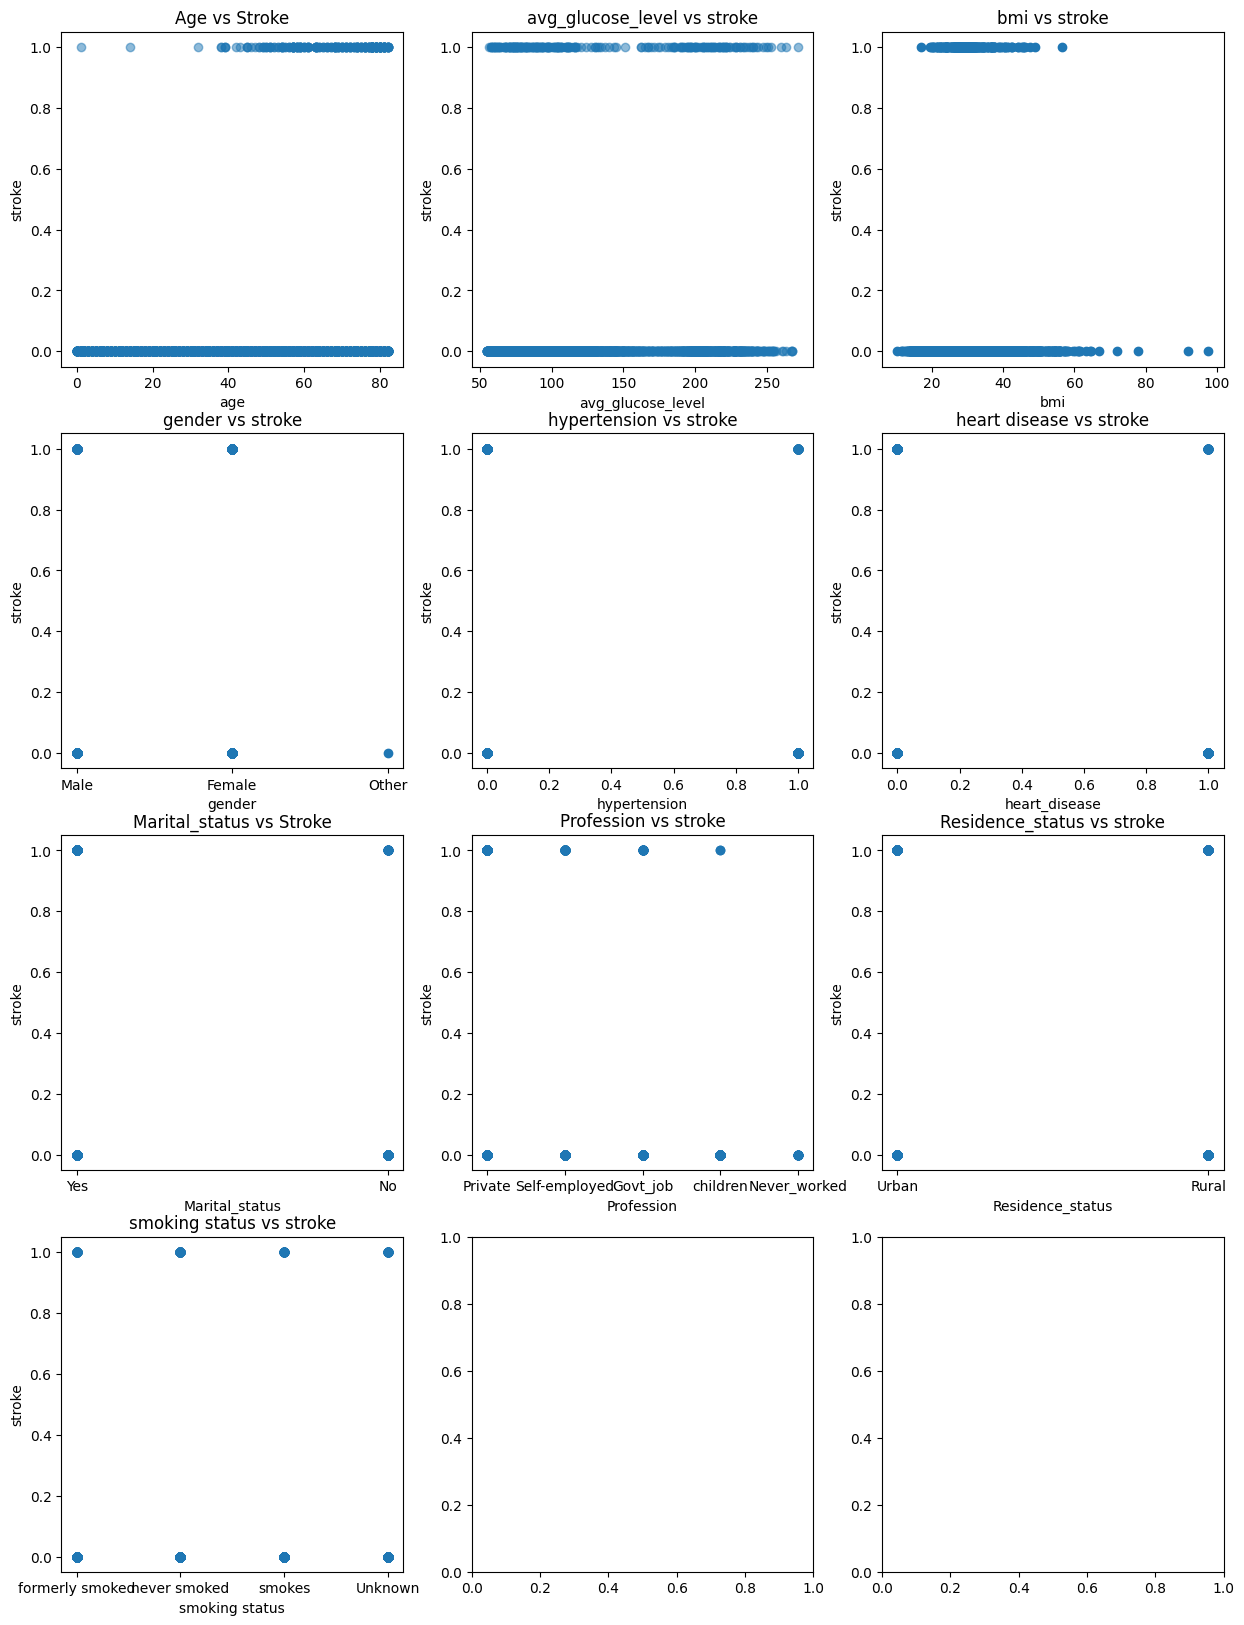

In [25]:
fig, ax =plt.subplots(4,3, figsize=(15,20))
# scatter plot between age and stroke
ax[0,0].scatter(stroke_data['age'],stroke_data['stroke'],alpha=0.5)
ax[0,0].set_xlabel('age')
ax[0,0].set_ylabel('stroke')
ax[0,0].set_title('Age vs Stroke')
# scatter plot between avg_glucose_level and stroke
ax[0,1].scatter(stroke_data['avg_glucose_level'],stroke_data['stroke'],alpha=0.5)
ax[0,1].set_xlabel('avg_glucose_level')
ax[0,1].set_ylabel('stroke')
ax[0,1].set_title("avg_glucose_level vs stroke")
# scatter plot between bmi and stroke
ax[0,2].scatter(stroke_data['bmi'],stroke_data['stroke'])
ax[0,2].set_xlabel('bmi')
ax[0,2].set_ylabel('stroke')
ax[0,2].set_title("bmi vs stroke")
ax[1,0].scatter(stroke_data['gender'],stroke_data['stroke'])
ax[1,0].set_xlabel('gender')
ax[1,0].set_ylabel('stroke')
ax[1,0].set_title("gender vs stroke")
# scatter plot between hypertension and stroke
ax[1,1].scatter(stroke_data['hypertension'],stroke_data['stroke'])
ax[1,1].set_xlabel('hypertension')
ax[1,1].set_ylabel('stroke')
ax[1,1].set_title('hypertension vs stroke')
# scatter plot between marital status and stroke
ax[1,2].scatter(stroke_data['heart_disease'],stroke_data['stroke'])
ax[1,2].set_xlabel('heart_disease')
ax[1,2].set_ylabel('stroke')
ax[1,2].set_title("heart disease vs stroke")
# scatter plot between marital_status and stroke
ax[2,0].scatter(stroke_data['Marital_status'],stroke_data['stroke'])
ax[2,0].set_xlabel('Marital_status')
ax[2,0].set_ylabel('stroke')
ax[2,0].set_title("Marital_status vs Stroke")
# scatter plot between Profession and stroke
ax[2,1].scatter(stroke_data['Profession'],stroke_data['stroke'])
ax[2,1].set_title('Profession vs stroke')
ax[2,1].set_xlabel('Profession')
ax[2,1].set_ylabel('stroke')
# scatter plot between residence status and stroke
ax[2,2].scatter(stroke_data['Residence_status'],stroke_data['stroke'])
ax[2,2].set_xlabel('Residence_status')
ax[2,2].set_ylabel('stroke')
ax[2,2].set_title("Residence_status vs stroke")
# scatter plot between smoking status and stroke
ax[3,0].scatter(stroke_data['smoking_status'],stroke_data['stroke'])
ax[3,0].set_title("smoking status vs stroke")
ax[3,0].set_xlabel('smoking status')
ax[3,0].set_ylabel('stroke')

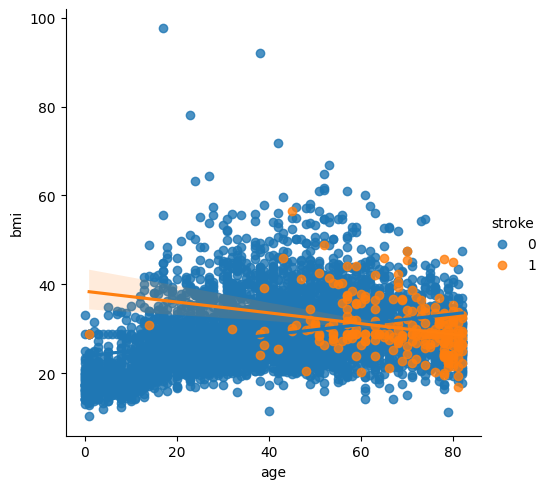

In [26]:
sns.lmplot(x='age',y='bmi',hue='stroke',data=stroke_data)

<Axes: >

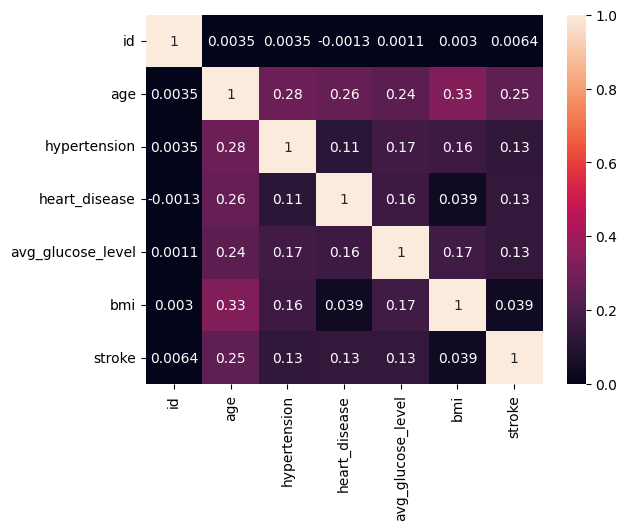

In [27]:
sns.heatmap(stroke_data.corr(numeric_only=True), annot=True)

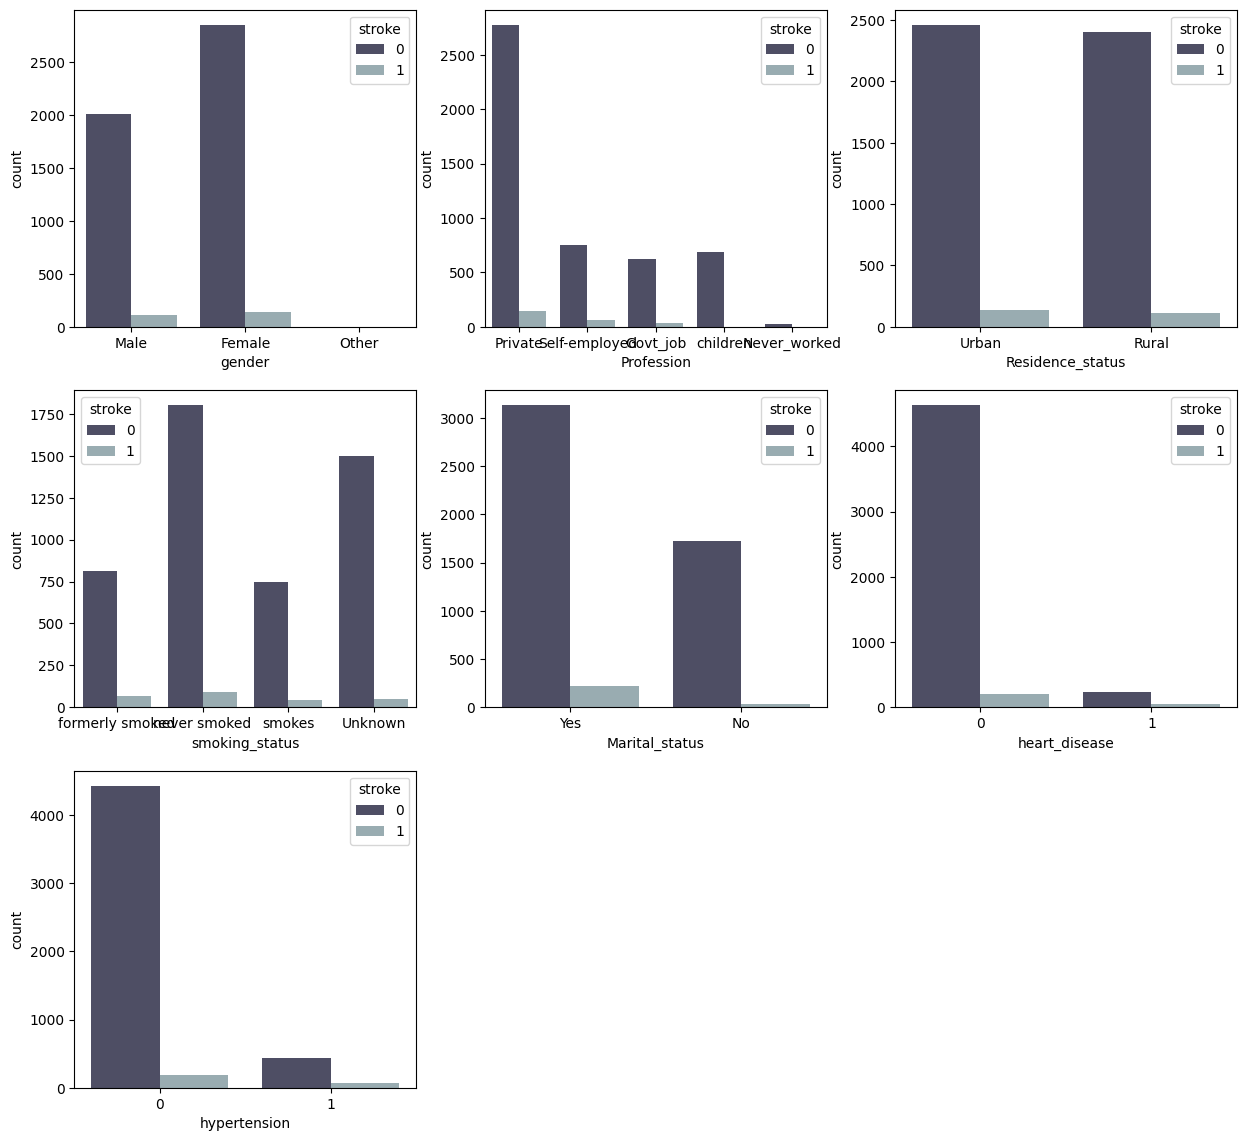

In [28]:
columns = ['gender','Profession','Residence_status','smoking_status','Marital_status','heart_disease','hypertension']
plt.figure(figsize=(15,14))
for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    
    sns.countplot(x=stroke_data[columns[i]],hue=stroke_data['stroke'],palette='bone')

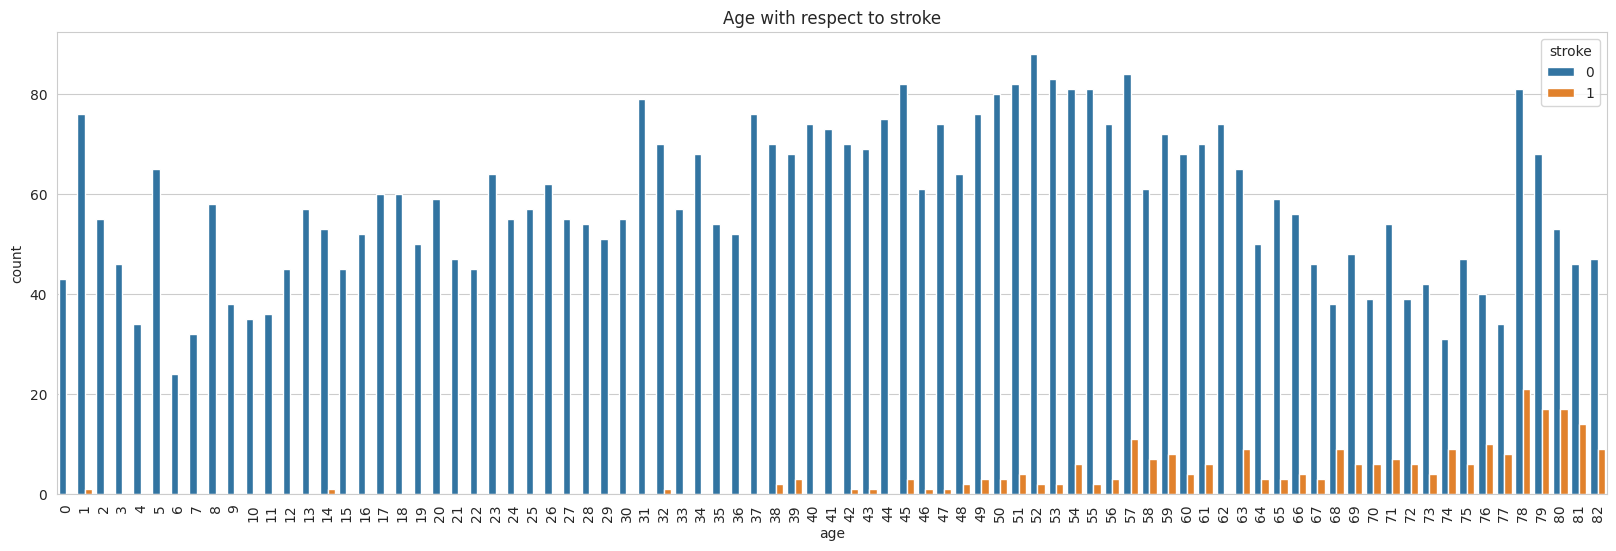

In [29]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
plt.title("Age with respect to stroke")
sns.countplot(x=stroke_data.age,hue=stroke_data.stroke)
plt.xticks(rotation=90)
plt.show()

In [30]:
stroke_data.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
Marital_status        object
Profession            object
Residence_status      object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object